In [17]:
import pandas as pd
import math
import numpy as np
import scipy
import os
import seaborn as sns
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [3]:
cc_df = pd.read_csv('master_cc.csv')

In [4]:
fc_df = pd.read_csv('master_fc.csv')

In [5]:
master = pd.read_csv('master_final.csv')

## T Tests

### Function that returns t test results via three different methods (for cross checking) and histogram

In [812]:
# TWO TAIL T TEST FUNCTION
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import matplotlib.pyplot as plt
import seaborn as sns

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def ttest(a1, b1):
    np.random.seed(1)

    # Create sample data.
    a = np.random.randn(40)
    b = 4*np.random.randn(50)

    # Use scipy.stats.ttest_ind.
    t, p = ttest_ind(a1, b1, equal_var=False)
    print("ttest_ind:            t = %g  p = %g" % (t, p))

    # Compute the descriptive statistics of a and b.
    abar = a1.mean()
    avar = a1.var(ddof=1)
    na = a1.size
    adof = na - 1

    bbar = b1.mean()
    bvar = b1.var(ddof=1)
    nb = b1.size
    bdof = nb - 1
    
    diff = abar - bbar

    # Use scipy.stats.ttest_ind_from_stats.
    t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                                  bbar, np.sqrt(bvar), nb,
                                  equal_var=False)
    print("ttest_ind_from_stats: t = %g  p = %g \n" % (t2, p2))

    # Use the formulas directly.
    tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
    dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
    pf = 2*stdtr(dof, -np.abs(tf))
    
    a1_var_name = namestr(a1, globals())[0]
    b1_var_name = namestr(b1, globals())[0]
    
    print("formula:              t = %g  p = %g" % (tf, pf))
    print(f"{a1_var_name} mean = {round(abar,2)} ; {b1_var_name} mean = {round(bbar,2)} ; diff = {round(diff,2)}")
    print(f"{a1_var_name} n = {len(a1)} ; {b1_var_name} n = {len(b1)}")
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    sns.distplot(a1 , color="skyblue", label="High")
    sns.distplot(b1 , color="red", label="Low")

    ax.legend([a1_var_name, b1_var_name])

    # ax.set(xlim=(0, 350))
    ax.set_ylabel('Density')


## 1. PAC & Soft money spending by federal contractors pre and post Citizens United

#### Get series of soft money spent by contractors pre and post CU

In [843]:
soft_postCU = master.loc[(master['year']>2011),'Soft_Orgs'].dropna()
soft_postCU.head()

408    2500
409       0
410       0
411       0
412       0
Name: Soft_Orgs, dtype: int64

In [839]:
soft_preCU = master.loc[(master['year']<=2011),'Soft_Orgs'].dropna()

#### Get series of PAC spending by contractors pre and post CU

In [845]:
PAC_postCU = master.loc[(master['year']>2011),'PACs'].dropna()
PAC_postCU.head()

408     316500
409      33000
410       5500
411    1389750
412      11500
Name: PACs, dtype: int64

In [841]:
PAC_preCU = master.loc[(master['year']<=2011),'PACs'].dropna()

#### Get series of sum of PAC and soft money by contractors pre and post CU

In [842]:
sPAC_postCU = master.loc[master['year']>2011][['Soft_Orgs','PACs']].sum(axis=1)
sPAC_postCU

408      319000
409       33000
410        5500
411     1389750
412       11500
413       40000
414      399959
415       73576
416       12000
417     2024919
418        6500
419       97000
420       19000
421      686899
422       14100
423        1000
424      244500
425      202500
426     1143452
427      245000
428        1416
429      118200
430     3505500
431      158000
432     1102500
433      167500
434      140000
435      214000
436      470000
437      634000
         ...   
1376      16100
1377     461150
1378      44000
1379      20500
1383     120250
1384     163000
1385      65100
1386      50500
1389      19000
1390       5000
1393      87000
1394     148600
1395      46285
1398     327800
1399     485660
1400     443499
1401     404000
1404     148000
1407     242100
1410      64500
1411      12300
1412     317350
1413     294600
1414     349299
1415     308696
1416      24500
1417      37600
1418     188000
1419        450
1420        300
Length: 998, dtype: int6

In [846]:
sPAC_preCU = master.loc[master['year']<=2011][['Soft_Orgs','PACs']].sum(axis=1)
sPAC_preCU

0        284404
1         18000
2       1028497
3        107600
4          6000
5        155800
6        345918
7         20500
8        308250
9         35500
10        49800
11        74250
12      4280200
13      1006676
14       130000
15       199000
16       271500
17       159500
18       187299
19       267580
20       110500
21        46500
22         9700
23        50619
24       206500
25       634500
26       119872
27        80000
28       470746
29       583850
         ...   
393      151304
394     2809399
395     1287500
396       30500
397      374039
398       20000
399     1848200
400        2000
401      190700
402      119560
403      481000
404        5000
405      194000
406      341675
407       26500
1380       4300
1381     217250
1382     123500
1387      74000
1388      26000
1391     102800
1392      92900
1396     687000
1397     204200
1402     104000
1403      69000
1405     207800
1406     222500
1408      62000
1409      91000
Length: 423, dtype: int6

#### Take the log of the summed series

In [847]:
lsPAC_postCU = np.log(sPAC_postCU)
lsPAC_preCU = np.log(sPAC_preCU)

#### T test results of sum of political spending by contractors, pre and post CU

ttest_ind:            t = 2.51954  p = 0.0118868
ttest_ind_from_stats: t = 2.51954  p = 0.0118868 

formula:              t = 2.51954  p = 0.0118868
sPAC_postCU mean = 519138.69 ; _ mean = 404309.4 ; diff = 114829.29
sPAC_postCU n = 998 ; _ n = 423


/Users/ptw/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x7fa5799f2198> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


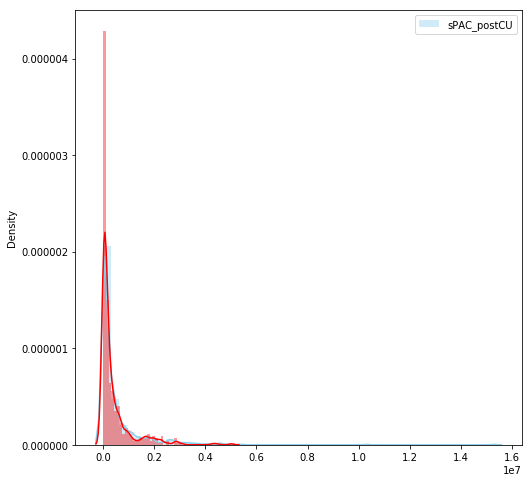

In [848]:
ttest(sPAC_postCU, sPAC_preCU)

ttest_ind:            t = 0.458022  p = 0.647047
ttest_ind_from_stats: t = 0.458022  p = 0.647047 

formula:              t = 0.458022  p = 0.647047
lsPAC_postCU mean = 11.77 ; lsPAC_preCU mean = 11.72 ; diff = 0.05


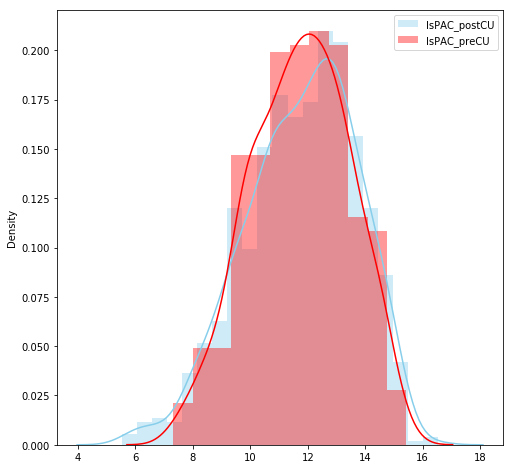

In [739]:
ttest(lsPAC_postCU, lsPAC_preCU)

## 2. Contract award of corps w vs w/o PACs

#### Get series of contract awarded to contractors with and without PAC spending

In [422]:
fc_wPAC = fc_df.loc[(fc_df['PAC']== 1),'current_award_x'].dropna()

In [423]:
fc_woPAC = fc_df.loc[(fc_df['PAC']== 0),'current_award_x'].dropna()

#### Log the series

In [743]:
lfc_wPAC = np.log(fc_wPAC)
lfc_woPAC = np.log(fc_woPAC)


#### Get series of contract awarded to contractors with and without PAC spending, pre and post CU

In [471]:
fc_wPAC_postCU = fc_df.loc[(fc_df['PAC']== 1) & (fc_df['year'] >2011),'current_award_x'].dropna()

In [472]:
fc_woPAC_postCU = fc_df.loc[(fc_df['PAC']== 0) & (fc_df['year'] >2011),'current_award_x'].dropna()

In [473]:
fc_wPAC_preCU = fc_df.loc[(fc_df['PAC']== 1) & (fc_df['year'] <=2011),'current_award_x'].dropna()

In [474]:
fc_woPAC_preCU = fc_df.loc[(fc_df['PAC']== 0) & (fc_df['year'] <=2011),'current_award_x'].dropna()

#### T test results of contractors with and without PAC, pre and post CU

ttest_ind:            t = 13.7169  p = 1.70726e-40
ttest_ind_from_stats: t = 13.7169  p = 1.70726e-40 

formula:              t = 13.7169  p = 1.70726e-40
lfc_wPAC mean = 18.23 ; lfc_woPAC mean = 16.82 ; diff = 1.41


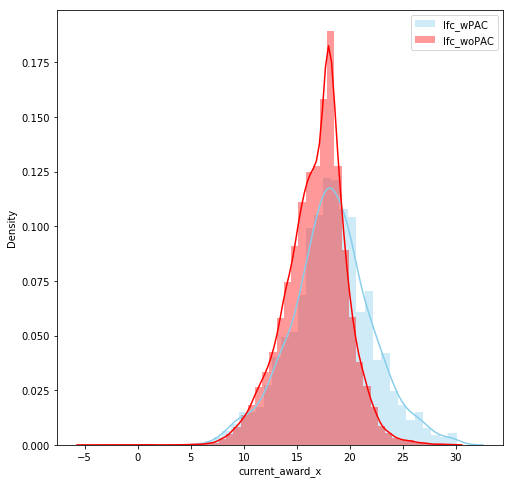

In [753]:
ttest(lfc_wPAC, lfc_woPAC)

ttest_ind:            t = 3.61397  p = 0.00031631
ttest_ind_from_stats: t = 3.61397  p = 0.00031631 

formula:              t = 3.61397  p = 0.00031631
fc_wPAC_postCU mean = 81923688310.28 ; fc_woPAC_postCU mean = 3035866845.71 ; diff = 78887821464.57


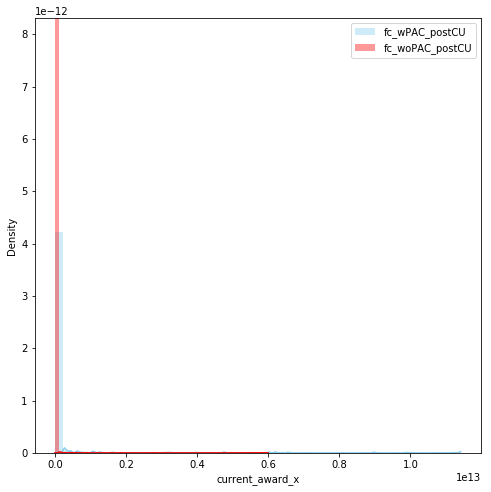

In [741]:
ttest(fc_wPAC_postCU, fc_woPAC_postCU)

ttest_ind:            t = 1.90631  p = 0.0571202
ttest_ind_from_stats: t = 1.90631  p = 0.0571202 

formula:              t = 1.90631  p = 0.0571202
fc_wPAC_preCU mean = 13068926519.24 ; fc_woPAC_preCU mean = 3403042314.66 ; diff = 9665884204.58


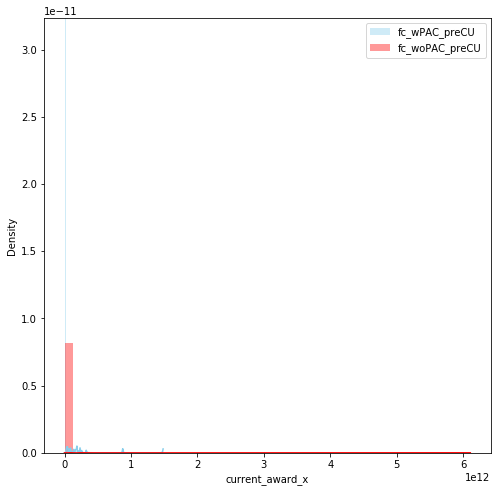

In [742]:
ttest(fc_wPAC_preCU, fc_woPAC_preCU)

## 3. Contractors donate the same as non contractors to Dems & Rep

### Get series of contractors' and non-contractors' donation to Democrats and Republicans

In [550]:
cc_df['Total'] = cc_df['Democrats_x'] + cc_df['Republicans_x']

In [553]:
cc_df['ShareDem'] = cc_df['Democrats_x']/cc_df['Total']

In [554]:
cc_df['ShareRep'] = cc_df['Republicans_x']/cc_df['Total']

In [555]:
cc_df['MoreDem'] = 0

In [556]:
cc_df.loc[cc_df['ShareDem'] > cc_df['ShareRep'], 'MoreDem'] = 1

### Calculation for proportional z test

In [557]:
cc_df.MoreDem.sum()

16445

In [558]:
cc_df.loc[(cc_df['FC']==1),'MoreDem'].sum()

469

In [560]:
cc_df.loc[(cc_df['FC']==1),'MoreDem'].count()

1426

In [567]:
469/1426

0.3288920056100982

In [561]:
cc_df.loc[(cc_df['FC']==0),'MoreDem'].sum()

15976

In [562]:
cc_df.loc[(cc_df['FC']==0),'MoreDem'].count()

39765

In [568]:
15976/39765

0.40176034200930466

In [563]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [569]:
count = np.array([469,15976])
nobs = np.array([1426,39765])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.10f}'.format(stat))
print('{0:0.10f}'.format(pval))

-5.5205307755
0.0000000338


In [849]:
count = np.array([15976, 469])
nobs = np.array([39765, 1426])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.10f}'.format(stat))
print('{0:0.10f}'.format(pval))

5.5205307755
0.0000000338


#### Get series for lollipop charts

In [876]:
nfc_post_d = cc_df[(cc_df['FC'] == 0) & (cc_df['Cycle_x'] > 2006) & (
    cc_df['Cycle_x'] < 2020)].groupby('Cycle_x')['Democrats_x'].sum()
nfc_post_d

Cycle_x
2008    378076775
2010    318733723
2012    310564672
2014    279213544
2016    360508188
2018    346952878
Name: Democrats_x, dtype: int64

In [877]:
nfc_post_r = cc_df[(cc_df['FC'] == 0) & (cc_df['Cycle_x'] > 2006) & (
    cc_df['Cycle_x'] < 2020)].groupby('Cycle_x')['Republicans_x'].sum()
nfc_post_r

Cycle_x
2008    278582416
2010    251276241
2012    386382570
2014    341892433
2016    415435748
2018    358460994
Name: Republicans_x, dtype: int64

In [878]:
fc_post_d = cc_df[(cc_df['FC'] == 1) & (cc_df['Cycle_x'] > 2006) & (
    cc_df['Cycle_x'] < 2020)].groupby('Cycle_x')['Democrats_x'].sum()
fc_post_d

Cycle_x
2008    66170112
2010    59929507
2012    65223184
2014    56378225
2016    82026555
2018    84393527
Name: Democrats_x, dtype: int64

In [879]:
fc_post_r = cc_df[(cc_df['FC'] == 1) & (cc_df['Cycle_x'] > 2006) & (
    cc_df['Cycle_x'] < 2020)].groupby('Cycle_x')['Republicans_x'].sum()
fc_post_r

Cycle_x
2008     64241714
2010     61241790
2012    101135102
2014     86366491
2016    119492336
2018    112329295
Name: Republicans_x, dtype: int64

In [881]:
yr = list(value1.index)

Text(0, 0.5, 'Year')

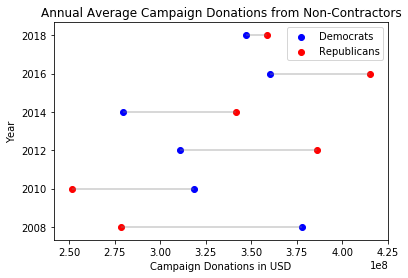

In [893]:
### NonContractor
# Create a dataframe
df = pd.DataFrame({'group':yr, 'value1':nfc_post_d , 'value2':nfc_post_r })
 
# Reorder it following the values of the first value:
# ordered_df = df.sort_values(by='value2')
# ordered_df=ordered_df.tail(10)
my_range=range(1,len(df.index)+1)

# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=df['value1'], xmax=df['value2'], color='grey', alpha=0.4)
plt.scatter(df['value1'], my_range, color='blue', alpha=1, label='Democrats')
plt.scatter(df['value2'], my_range, color='red', alpha=1 , label='Republicans')
plt.legend(prop={'size': 10})

# Add title and axis names
plt.yticks(my_range, df['group'])
plt.title("Annual Average Campaign Donations from Non-Contractors")
plt.xlabel('Campaign Donations in USD')
plt.ylabel('Year')
# plt.savefig("4a_WGGENR.jpg")


## 4. Contractors donate the same amount of PAC & soft money as non contractors

### Get series of contractors and non-contractors' PAC and soft money spending

In [782]:
PAC_fc_postCU = cc_df.loc[(cc_df['Cycle_x'] >2011) & (cc_df['FC'] == 1),'PACs_x'].dropna()

In [783]:
PAC_nfc_postCU = cc_df.loc[(cc_df['Cycle_x'] >2011) & (cc_df['FC'] == 0),'PACs_x'].dropna()

In [784]:
PAC_fc_preCU = cc_df.loc[(cc_df['Cycle_x'] <=2011) & (cc_df['FC'] == 1),'PACs_x'].dropna()

In [785]:
PAC_nfc_preCU = cc_df.loc[(cc_df['Cycle_x'] <=2011) & (cc_df['FC'] == 0),'PACs_x'].dropna()

In [786]:
Soft_fc_postCU = cc_df.loc[(cc_df['Cycle_x'] >2011) & (cc_df['FC'] == 1), 'Soft (Orgs)'].dropna()

In [787]:
Soft_nfc_postCU = cc_df.loc[(cc_df['Cycle_x'] >2011) & (cc_df['FC'] == 0), 'Soft (Orgs)'].dropna()

In [788]:
Soft_fc_preCU = cc_df.loc[(cc_df['Cycle_x'] <=2011) & (cc_df['FC'] == 1), 'Soft (Orgs)'].dropna()

In [789]:
Soft_nfc_preCU = cc_df.loc[(cc_df['Cycle_x'] <=2011) & (cc_df['FC'] == 0), 'Soft (Orgs)'].dropna()

In [802]:
sPAC_fc = cc_df.loc[cc_df['FC'] == 1][['Soft (Orgs)','PACs_x']].sum(axis=1)
sPAC_fc

17       4551500
18       4110250
19       1752750
20       3197000
22        583850
97         39500
257      1243496
258      1483162
259      1302250
260       577000
261       673776
262       986799
337      4633700
338      4458789
339      3455750
340      3505500
341      4445075
342      4280200
385      2000922
386      2316500
387      2685500
388      2321850
389      1848200
390      1960100
417      3922881
418      3233255
419      2912633
420      2838588
421      2809399
422      2914457
          ...   
40268     121500
40269      26100
40286     394000
40287     276450
40313       3350
40458      20500
40459      13103
40460       3350
40461       4100
40462      41800
40463      37700
40499       3261
40572      68000
40574      58000
40575      23000
40596      33000
40617       1000
40951      40500
40952      39000
40953      45800
40976       5000
40977      61000
41042       2700
41069       8900
41070       4000
41072      12000
41073       7200
41151      360

In [805]:
sPAC_nfc = cc_df.loc[cc_df['FC'] == 0][['Soft (Orgs)','PACs_x']].sum(axis=1)
sPAC_nfc

0         987778
1        1329559
2         351924
3         339887
4         157025
5         920295
6         643941
7         554869
8         682707
9         409580
10        537386
11        149455
12        217859
13        114540
14         62460
15         41000
16          5000
21        627800
23        404350
24        354300
25       1282150
26       1498115
27       1205974
28       1445602
29       1069293
30       1042662
31        459478
32        229500
33        183021
34        419700
          ...   
41161      16800
41162        500
41163        600
41164       4300
41165       3100
41166       3025
41167       7576
41168      27250
41169       3000
41170       1000
41171       1500
41172       1200
41173      15950
41174     201000
41175     122500
41176     109787
41177     257542
41178      84500
41179     129000
41180      43500
41181     389100
41182      23500
41183      50273
41184      17000
41185     644829
41186     739335
41187       3500
41188      100

In [807]:
lsPAC_fc = np.log(sPAC_fc).dropna()

In [808]:
lsPAC_fc

17       15.330967
18       15.228994
19       14.376697
20       14.977723
22       13.277399
97       10.584056
257      14.033437
258      14.209687
259      14.079604
260      13.265598
261      13.420653
262      13.802222
337      15.348866
338      15.310388
339      15.055550
340      15.069844
341      15.307307
342      15.269510
385      14.509119
386      14.655568
387      14.803377
388      14.657875
389      14.429723
390      14.488506
417      15.182337
418      14.989000
419      14.884568
420      14.858817
421      14.848481
422      14.885194
           ...    
40268    11.707670
40269    10.169691
40286    12.884106
40287    12.529785
40313     8.116716
40458     9.928180
40459     9.480596
40460     8.116716
40461     8.318742
40462    10.640652
40463    10.537415
40499     8.089789
40572    11.127263
40574    10.968198
40575    10.043249
40596    10.404263
40617     6.907755
40951    10.609057
40952    10.571317
40953    10.732039
40976     8.517193
40977    11.

In [809]:
lsPAC_nfc = np.log(sPAC_nfc).dropna()

### T test results of contractors and non-contractors' PAC and soft money spending

ttest_ind:            t = 8.62724  p = 1.94207e-17
ttest_ind_from_stats: t = 8.62724  p = 1.94207e-17 

formula:              t = 8.62724  p = 1.94207e-17
sPAC_fc_postCU mean = 519063.91 ; sPAC_nfc_postCU mean = 235028.64 ; diff = 284035.26
sPAC_fc_postCU n = 1000 ; sPAC_nfc_postCU n = 12505


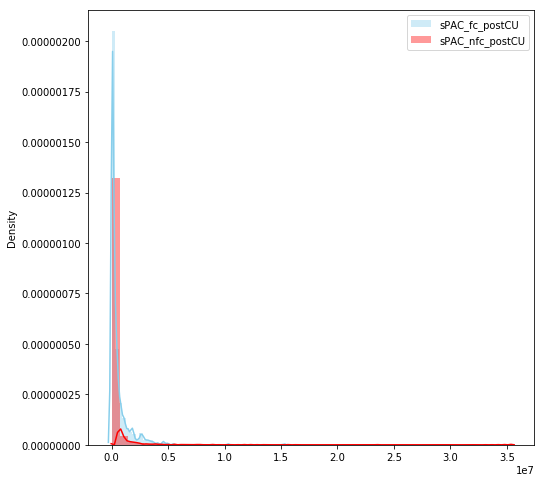

In [813]:
ttest(sPAC_fc_postCU, sPAC_nfc_postCU)

ttest_ind:            t = 7.71176  p = 8.72479e-14
ttest_ind_from_stats: t = 7.71176  p = 8.72479e-14 

formula:              t = 7.71176  p = 8.72479e-14
sPAC_fc_preCU mean = 402164.03 ; sPAC_nfc_preCU mean = 148551.94 ; diff = 253612.09
sPAC_fc_preCU n = 426 ; sPAC_nfc_preCU n = 27260


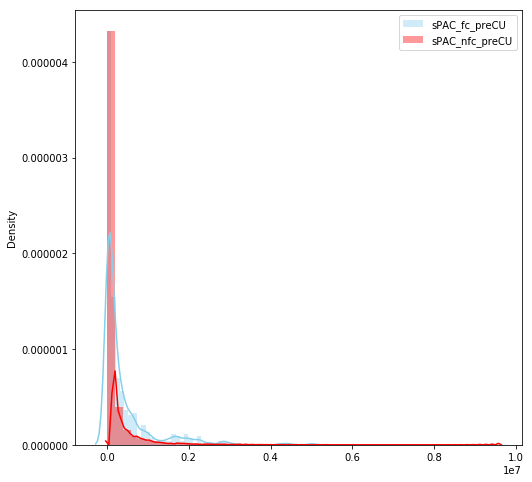

In [814]:
ttest(sPAC_fc_preCU, sPAC_nfc_preCU)

ttest_ind:            t = 29.1759  p = 2.11927e-149
ttest_ind_from_stats: t = 29.1759  p = 2.11927e-149 

formula:              t = 29.1759  p = 2.11927e-149
_ mean = 11.75 ; lsPAC_nfc mean = 10.28 ; diff = 1.48


/Users/ptw/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x7fa45a4d2438> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


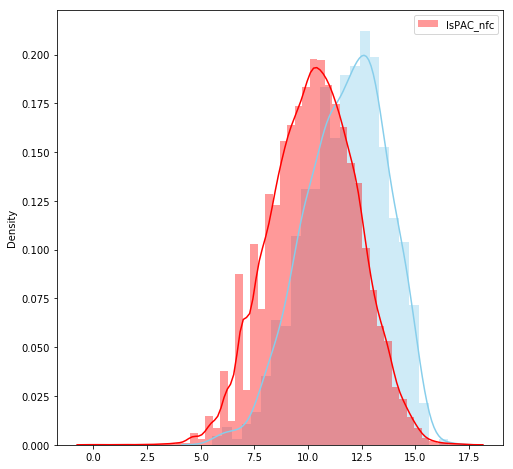

In [810]:
ttest(lsPAC_fc, lsPAC_nfc)

###  Bubble charts by year

In [9]:
master_df = master[[
 'recipient_parent_name1',
 'recipient_name_clean',
 'recipient_name',
 'org_name_clean',
 'org_name',
 'current_award',
 'potential_award',
 'num_employees',
 'annual_revenue',
 'year',
 'Democrats',
 'Republicans',
 'PACs',
 'Soft_Orgs',
 'Total1',
]]

#### Feature engineering

In [10]:
master_df['pacs_plus_softorgs'] = master_df.PACs + master_df.Soft_Orgs
print(master_df.shape)
master_df.head()

(1421, 16)


/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,recipient_parent_name1,recipient_name_clean,recipient_name,org_name_clean,org_name,current_award,potential_award,num_employees,annual_revenue,year,Democrats,Republicans,PACs,Soft_Orgs,Total1,pacs_plus_softorgs
0,3MCOMPANY,3m,3M COMPANY,3m,3M CO,7.838262e+06,4.342798e+07,2.854455e+06,1.030000e+12,2008,180494,257681,284404,0,438175,284404
1,ABBLTD,abb,ABB LTD,abb,ABB GROUP,3.163537e+05,3.163537e+05,2.164675e+04,6.203500e+09,2008,10686,10850,18000,0,21536,18000
2,ABBOTTLABORATORIES,abbott laboratories,ABBOTT LABORATORIES,abbott laboratories,ABBOTT LABORATORIES,2.329304e+07,6.244787e+07,5.342950e+04,1.786237e+09,2008,575791,709850,1028497,0,1285641,1028497
3,ADVANCEDACOUSTICCONCEPTSINC,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS INC.,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS,2.627054e+07,5.877078e+07,2.000000e+02,2.691478e+07,2008,119550,23300,107600,0,142850,107600
4,AFOGNAKNATIVECORPORATION,afognak native,AFOGNAK NATIVE CORPORATION,afognak native,AFOGNAK NATIVE CORP,4.654850e+08,1.040796e+09,4.909336e+02,1.786700e+07,2008,6070,3750,6000,0,9820,6000


In [11]:
master_df['current_award_scaled'] = master_df.current_award/100
master_df['soft_dummy'] = (master_df.Soft_Orgs > 0).astype(int)
master_df['current_award_scaled_log'] = np.log(master_df.current_award_scaled)
master_df['pacs_plus_softorgs_log'] = np.log(master_df.pacs_plus_softorgs)

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [12]:
def soft_size_or_50(x):
    if x > 0:
        return max(50, x/1000)
    else:
        return 50

In [13]:
master_df['soft_dummy_size'] = master_df.Soft_Orgs.apply(soft_size_or_50)

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Top 100 corporations by total current award amount

In [14]:
top_100 = list(master_df.groupby('org_name_clean')['current_award'].sum().sort_values(ascending=False).reset_index()['org_name_clean'].values)[:100]
len(top_100)

100

Filter data down to the columns of interest

In [15]:
input_data = master_df[['org_name_clean', 'year', 'current_award_scaled', 'pacs_plus_softorgs', 'num_employees', 'annual_revenue', 'Soft_Orgs', 'soft_dummy', 'pacs_plus_softorgs_log', 'current_award_scaled_log', 'soft_dummy_size']]
# input_data = input_data[input_data.org_name_clean.isin(top_100)]  # top 100
print(input_data.shape)
input_data.head()

(1421, 11)


,org_name_clean,year,current_award_scaled,pacs_plus_softorgs,num_employees,annual_revenue,Soft_Orgs,soft_dummy,pacs_plus_softorgs_log,current_award_scaled_log,soft_dummy_size
0,3m,2008,7.838262e+04,284404,2.854455e+06,1.030000e+12,0,0,12.558151,11.269358,50.0
1,abb,2008,3.163537e+03,18000,2.164675e+04,6.203500e+09,0,0,9.798127,8.059446,50.0
2,abbott laboratories,2008,2.329304e+05,1028497,5.342950e+04,1.786237e+09,0,0,13.843609,12.358495,50.0
3,advanced acoustic concepts,2008,2.627055e+05,107600,2.000000e+02,2.691478e+07,0,0,11.586176,12.478789,50.0
4,afognak native,2008,4.654850e+06,6000,4.909336e+02,1.786700e+07,0,0,8.699515,15.353420,50.0


#### Save image below for each year (and record gif manually)

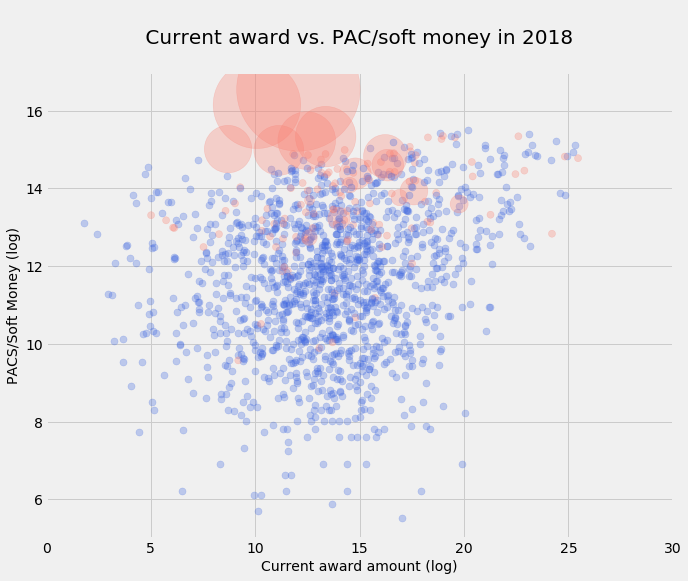

In [19]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for yr in range(2008, 2019, 2):  
    d = input_data[input_data.year == yr]
    soft_1 = d[d.soft_dummy == 1]
    soft_0 = d[d.soft_dummy == 0]

    ax.scatter(soft_1.current_award_scaled_log, soft_1.pacs_plus_softorgs_log, s=soft_1.soft_dummy_size, alpha=0.3, color='salmon')
    ax.scatter(soft_0.current_award_scaled_log, soft_0.pacs_plus_softorgs_log, s=50, alpha=0.3, color='royalblue')

    ax.set_title(f'\n Current award vs. PAC/soft money in {yr} \n', size=20)
    ax.set_ylabel('PACS/Soft Money (log)', size=14)
    ax.set_xlabel('Current award amount (log)', size=14)

    ax.set_ylim([5,17])
    ax.set_xlim([0, 30])
    plt.savefig(os.getcwd() + f'_current_award_vs_pac_soft_{yr}.png')